# Continious Normalizing Flow
---

Ссылки

1. [Neural Ordinary Differential Equations](https://arxiv.org/pdf/1806.07366.pdf)
2. [Знакомство с Neural ODE](https://habr.com/ru/companies/ods/articles/442002/)
3. [PointFlow: 3D Point Cloud Generation with Continuous Normalizing Flows](https://arxiv.org/pdf/1906.12320v3.pdf)
4. [Multi-Resolution Continuous Normalizing Flows](https://arxiv.org/pdf/2106.08462v5.pdf)

Код

1. [PointFlow: 3D Point Cloud Generation with Continuous Normalizing Flows](https://github.com/stevenygd/PointFlow)
1. [Multi-Resolution Continuous Normalizing Flows](https://github.com/voletiv/mrcnf)

## Введение

В нормализирующих потоках мы использовали теорему о подмене переменной чтобы получить точное изменение распределения при помощи биективной функции $f$
$$
z_1 = f(z_0) \Longrightarrow \log p(z_1) = \log p(z_0) - \log\left|\det\dfrac{df}{dz_0}\right|
$$
Например планарный (линейный) нормализующий поток можно записать так
$$
z(t+1) = z(t) + uh(w^T z(t) + b) \Longrightarrow \log p(z(t+1)) = \log p(z(t)) - \log\left|1 + u^T\dfrac{dh}{dz}\right|
$$
Проблема такого подхода заключается в дискретности переходов от потока к потоку. Теперь представим, что наша величина $z_i$ на самом деле является функцией по времени $z(t)$, а поток $f(z, t)$ — ее производная по времени. То есть поток теперь — функция характеризующая изменение состояния $z(t)$ в любой момент $t$, то есть преобразование состояния происходит непрерывно во времени. 

## Теорема о замене переменной

Положим, что $z(t)$ — континуальная случайная величина с плотностью $p(z(t))$, зависящая от времени. Положим, что $dz(t)/dt = f(z(t), t)$ — дифференциальное уравнение, описывающее изменение нашей величины от времени. Положим, что $f$ — Липшецево отображение, тогда
$$
\dfrac{∂\log p(z(t))}{∂t} = -\text{tr}\left(\dfrac{df}{dz(t)}\right)
$$

## Доказательство

Возьмем небольшое приращение времени $ɛ: |ɛ|\ll 1$. Запишем изменение $z(t)$ при приращении как
$$
z(t + ɛ)\overset{\text{def}}{=}T_ɛ (z(t))
$$
Положим, что $f$ — непрерывно по Липшецу на $z(t)$ и непрерывно по $t$. Тогда по теоремме Пикарда о существовании каждое знаение аргумента имеет единственное значение функции. Также полагаем, что $z(t)$ — ограничено. Тогда $f$, $T_ɛ$ и $\frac{∂}{∂z}T_ɛ$ — тоже ограничены. Теперь пользуясь всем этим знанием распишем частную производную
$$
\begin{split}
\dfrac{∂\log p(z(t))}{∂t} & = \lim\limits_{ɛ\to 0^+}\dfrac{\log p(z(t)) - \log|\det\frac{∂}{∂z}T_ɛ(z(t))| - \log p(z(t))}{ɛ} \\
& = - \lim\limits_{ɛ\to 0^+}\dfrac{\log|\det\frac{∂}{∂z}T_ɛ(z(t))|}{ɛ} \\
& = - \lim\limits_{ɛ\to 0^+}\dfrac{\frac{∂}{∂ɛ}\log|\det\frac{∂}{∂z}T_ɛ(z(t))|}{\frac{∂}{∂ɛ}ɛ}~\text{(правило Лопиталя)} \\
& = - \lim\limits_{ɛ\to 0^+}\dfrac{\frac{∂}{∂ɛ}|\det\frac{∂}{∂z}T_ɛ(z(t))|}{|\det\frac{∂}{∂z}T_ɛ(z(t))|} \\
& = - \lim\limits_{ɛ\to 0^+}|\det\frac{∂}{∂z}T_ɛ(z(t))|
\end{split}
$$

Производная определителя может быть расписан по формуле Якоби
$$
\begin{split}
\dfrac{∂\log p(z(t))}{∂t} & =  - \lim\limits_{ɛ\to 0^+}\text{tr}\left(\text{adj}\left(\dfrac{∂}{∂z}T_ɛ(z(t))\right)\dfrac{∂}{∂ɛ}\dfrac{∂}{∂z}T_ɛ(z(t))\right) \\
& =  - \text{tr}\left(\left(\lim\limits_{ɛ\to 0^+}\text{adj}\left(\dfrac{∂}{∂z}T_ɛ(z(t))\right)\right)\left(\lim\limits_{ɛ\to 0^+}\dfrac{∂}{∂ɛ}\dfrac{∂}{∂z}T_ɛ(z(t))\right)\right) \\
& =  - \text{tr}\left(\lim\limits_{ɛ\to 0^+}\dfrac{∂}{∂ɛ}\dfrac{∂}{∂z}T_ɛ(z(t))\right)
\end{split}
$$

Закончим доказательство разложением $T_ɛ(z(t))$ по Тейлору
$$
\begin{split}
\dfrac{∂\log p(z(t))}{∂t} & = - \text{tr}\left(\lim\limits_{ɛ\to 0^+}\dfrac{∂}{∂ɛ}\dfrac{∂}{∂z}(z + ɛf(z(t), t)+O(ɛ^2)+O(ɛ^3)+…)\right) \\
& = - \text{tr}\left(\lim\limits_{ɛ\to 0^+}\dfrac{∂}{∂ɛ}(1 + \dfrac{∂}{∂z}ɛf(z(t), t)+O(ɛ^2)+O(ɛ^3)+…)\right) \\
& = - \text{tr}\left(\lim\limits_{ɛ\to 0^+}(\dfrac{∂}{∂z}f(z(t), t)+O(ɛ)+O(ɛ^2)+…)\right) \\
& = - \text{tr}\left(\dfrac{∂}{∂z}f(z(t), t)\right)
\end{split}
$$


Таким образом мы можем представить непрерывный аналог планарного потока
$$
\dfrac{dz(t)}{dt} = uh(w^T z(t) + b) \Longrightarrow \dfrac{∂\log p(z(t))}{∂t} = -u^T\dfrac{dh}{dz}
$$

## Многомерные сети

Пока поток $f$ не линейна, путь по Якобиана обладает свойством
$$
\text{tr}\left(\sum\limits_n J_n\right) = \sum\limits_n \text{tr}\left(J_n\right)
$$
Таким образом если наша динамика пораждена суммой функций, диффур логарифма плотности также является суммой
$$
\dfrac{dz(t)}{dt} = \sum\limits_{i=1}^Mf_i(z(t)) \Longrightarrow \dfrac{∂\log p(z(t))}{∂t} = \sum\limits_{i=1}^M\text{tr}\left
(\dfrac{df_i}{dz}\right)
$$

Получается мы можем дешево (по сложности) обучать потоковые модели с большим числом скрытых слоев со сложностью равной числу скрытых слоев $O(M)$. В тоже время использование таких "широких" потоков в обычных нормализационных моделях имеет сложность $O(M^3)$.

## Использование динамики во времени

Также интересно то, что мы можем использовать один поток с параметром времени, то есть явно зависимый от времени $f(z(t), t)$, а не $f(z(t))$. Также авторы метода предлагают новый страбирующий метод
$$
\dfrac{dz(t)}{dt} = \sum\limits_nσ_n(t)f_n(z),~σ\in(0,1)
$$
где $σ_n(t)$ — нейронная сеть.

## Численное решение задачи Коши ОДУ

Рассмотрим задачу Коши первого порядка обыкновенного дифференциального уравнения
$$
\begin{cases}
\dfrac{dz(t)}{dt} = f(z(t), t), \\
z(t_0) = z_0.
\end{cases}
$$

Такое уравнение мы можем решать численно методами Рунге-Кутты. Для того чтобы понять, как это работает, рассмотрим вывод самого простого метода — метода Эйлера. Проинтегрируем обе части уравнения
$$
\dfrac{dz(t)}{dt} = f(z(t), t)⇒ dz(t) = f(z(t), t)dt⇒\int dz(t) = \int f(z(t), t)dt
$$
Так как численное решение не может быть рассчитано на всем бесконечном временном отрезке, возьмем отрезок $[t_0, t_N]$ для которого определен отрезок $[z_0, z_N]$. Тогда решение на этом отрезке расписывается как определенный интеграл
$$
\int\limits_{z_0}^{z_N} dz(t) = \int\limits_{t_0}^{t_N} f(z(t), t)dt⇒z_N - z_0 = \int\limits_{t_0}^{t_N} f(z(t), t)dt⇒z_N = z_0 + \int\limits_{t_0}^{t_N} f(z(t), t)dt
$$
Для численного интегрирования воспользуемся методом прямоугольников. Для этого введем равномерную сетку по времени количеством значений $N$ и с шагом $h$ такие, что $h = \frac{|t_1 - t_0|}{N}↔N=\frac{|t_1 - t_0|}{h}$. Так сетка по времени выглядит как $t_i=t_0+h\cdot i,~i=0,\dots,N$.
$$
\int\limits_{t_0}^{t_N} f(z(t), t)dt≈∑\limits_{i=0}^N hf(z_i, t_i)⇒z_N = z_0 + ∑\limits_{i=0}^N hf(z_i, t_i)
$$
Но так как в задаче Коши нам дано только значение $z(t_0)$, то решать задачу будем итерационно
$$
z_i = z_{i-1} + hf(z_i, t_i)
$$

## Нейронные ОДУ

Теперь положим, что мы не знаем $f(z(t), t)$. Возьмем в качестве производной $f$ функцию $f(z(t), t, θ)$, параметризованную функцию некоторого семейства параметризованных функций (например нейронную сеть). Тогда при наличии множества пар $\{z_i, t_i\}_{i=0}^N$ можно аппроксимировать неизвестную нам функцию $f(z(t), t)$ функцией $f(z(t), t, θ)$. Делать мы это будем решая уравнение методом Рунге-Кутты $rk$ и вычисляя функцию потерь
$$
L(z_N) = L(rk(z_0, f_θ, t_0, t_N, θ))\to\min\limits_{θ}
$$

Далее нужно посчитать обратное распространение ошибки. Современные фреймворки позволяют автоматически рассчитывать обратное распространение, однако авторы метода предлагают воспользоваться свойством ОДУ, позволяющим вычислять уравнение в обратном направлении дл ускорения рассчетов.

Для рассчета обратного распространения необходимо рассчитать градиенты по всем параметрам $z_0$, $t_0$, $t_N$, $θ$. Для их рассчета предлагается параметризация градиентов через переменную $a(t)$
$$
a(t) = -\dfrac{∂L}{∂z(t)}
$$

Эта переменная назыается сопряженным (adjoint) состоянием. Ее градиент рассчитывается как
$$
\dfrac{da(t)}{dt} = -a(t)\dfrac{∂ f(z(t), t, θ)}{∂ z}
$$

Вывод этой формулы предагается в оригинальной статье и вычисляется через сложную производную (chain rule). С помощью этой параметризации градиент для обратного распространения ошибки сводится к решению ОДУ в обратную сторону
$$
\dfrac{∂L}{∂z(t_0)} = \int\limits_{t_N}^{t_0} a(t)\dfrac{∂ f(z(t), t, θ)}{∂ z}dt
$$
Рассчет градиентов $t$ и $θ$ можно расчитать как честь состояния. Такое состояние завется аугментированным.
$$
\dfrac{d}{dt}
\begin{bmatrix}
z \\ θ \\ t
\end{bmatrix} (t) = f_{aug}([z, θ, t]) =
\begin{bmatrix}
f(z(t), t, θ) \\ 0 \\ 1
\end{bmatrix}
$$
Тогда сопряженное состояние к этому аугментированному состоянию
$$
a_{aug} =
\begin{bmatrix}
a \\ a_θ \\ a_t
\end{bmatrix},~
a_θ(t) = \dfrac{∂L}{∂θ(t)},~a_t(t) = \dfrac{∂L}{∂t(t)}
$$
Градиент аугментированной динамики
$$
\dfrac{da_{aug}}{dt} = -
\begin{bmatrix}
a\frac{∂f}{∂z} & a\frac{∂f}{∂θ} & a\frac{∂f}{∂t}
\end{bmatrix}^T
$$

Решение этого ОДУ назад во времени дает градиенты по всем входным параметрам в решатель ОДУ и могут быть вычислены за один проход метода $rk$
$$
\begin{cases}
\dfrac{∂L}{∂z(t_0)} = \int\limits_{t_N}^{t_0} a(t) \dfrac{∂f(z(t), t, θ)}{∂z}dt \\
\dfrac{∂L}{∂θ} = \int\limits_{t_N}^{t_0} a(t) \dfrac{∂f(z(t), t, θ)}{∂θ}dt \\
\dfrac{∂L}{∂t_0} = \int\limits_{t_N}^{t_0} a(t) \dfrac{∂f(z(t), t, θ)}{∂t}dt \\
\dfrac{∂L}{∂t_N} = -a(t) \dfrac{∂f(z(t), t, θ)}{∂t}dt \\
\end{cases}
$$
Ниже приведена иллюстрация прямого и обратного распространения ошибки в нейронных ОДУ.
<figure>
<img src="https://habrastorage.org/r/w1560/webt/7e/65/hf/7e65hfxs1amdqyy_uy6emdwulkg.png" alt="Примеры схем генеративных моделй" style="width:60%">
<figcaption align = "center">Схема прямого и обратного распространения ошибки нейронных ОДУ</figcaption>
</figure>
Также представлен алгоритм рассчета обратного распространения ошибки.
<figure>
<img src="https://habrastorage.org/r/w1560/webt/8k/pz/uk/8kpzukmizpmezmywov4b3zm29lc.png" alt="Примеры схем генеративных моделй" style="width:100%">
<figcaption align = "center">Алгоритм вычисления обратного распространения ошибки</figcaption>
</figure>

In [ ]:
!pip install torchdiffeq

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm
from torchdiffeq import odeint_adjoint as odeint

In [82]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y0 = torch.Tensor([[0.6, 0.3]]).to(device)
t = torch.linspace(0., 15., 500).to(device)
A = torch.Tensor([[-0.1, -1.], [1., -0.1]]).to(device)

In [100]:
class Lambda(nn.Module):
    def forward(self, t, y):
        return torch.mm(y, A)

y = odeint(Lambda(), y0, t, method='dopri5')[:, 0] 
y = y + 0.1 * torch.randn(y.size())

In [118]:
def get_batch(y, t, batch_time=10, batch_size=256):
    size = len(t)
    start = np.random.randint(size-batch_time, size=batch_size)
    y0 = y[start]
    ts = t[:batch_time]
    ys = torch.stack([y[start + i] for i in range(batch_time)], dim=0)
    return y0, ts, ys

In [136]:
class ODEF(nn.Module):

    def __init__(self):
        super().__init__()
        self.net =nn.Linear(2, 2, bias=False)

    def forward(self, t, y):
        return self.net(y)

In [149]:
def plot(func, y, y0, t, epoch: int = None):
    y_pred = odeint(func, torch.tensor([[2., 0.]]).to(device), t, method='dopri5')[:, 0]

    plt.figure(figsize=(12, 3))

    ax = plt.subplot(1, 3, 1)
    ax.set_title('Фазовый портрет')
    ax.plot(y_pred.detach()[:, 0].cpu(), y_pred.detach()[:, 1].cpu(), c='r')
    ax.scatter(y.detach()[:, 0].cpu(), y.detach()[:, 1].cpu(), s=1, c='k', alpha=0.7)
    ax.set_ylim(-2, 2)
    ax.set_xlim(-2, 2)
    ax.set_xlabel('$y_1$')
    ax.set_ylabel('$y_2$')

    ax = plt.subplot(1, 3, 2)
    ax.set_title('Траектории')
    ax.plot(t.cpu(), y_pred.detach()[:, 0].cpu())
    ax.plot(t.cpu(), y_pred.detach()[:, 1].cpu())
    ax.scatter(t.cpu(), y.detach()[:, 0].cpu(), s=1, alpha=0.7)
    ax.scatter(t.cpu(), y.detach()[:, 1].cpu(), s=1, alpha=0.7)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y_1$, $y_2$')
    ax.set_xlim(t.cpu().min(), t.cpu().max())
    ax.set_ylim(-2, 2)

    ax = plt.subplot(1, 3, 3)
    Y, X = np.mgrid[-2:2:21j, -2:2:21j]
    dydt = func(0, torch.Tensor(np.stack([X, Y], -1).reshape(21 * 21, 2)).to(device)).cpu().detach().numpy()
    mag = np.sqrt(dydt[:, 0]**2 + dydt[:, 1]**2).reshape(-1, 1)
    dydt = (dydt / mag)
    dydt = dydt.reshape(21, 21, 2)

    ax.set_title('Векторное поле обучения')
    ax.streamplot(X, Y, dydt[:, :, 0], dydt[:, :, 1], color="black")
    ax.set_xlabel('$y_1$')
    ax.set_ylabel('$y_2$')
    ax.set_ylim(-2, 2)
    ax.set_xlim(-2, 2)
    
    plt.tight_layout()
    if epoch is None:
        plt.show();
    else:
        plt.savefig('imgs/{:04d}'.format(epoch));
        plt.clf();
        plt.close();

In [151]:
import imageio.v2 as imageio
import shutil
from pathlib import Path
from IPython.display import Image

Path('imgs').mkdir(exist_ok=True)

random.seed(0);
np.random.seed(0);
torch.manual_seed(0);
torch.cuda.manual_seed(0);
torch.cuda.manual_seed_all(0);

epoches = 1000
func = ODEF().to(device)
optimizer = torch.optim.RMSprop(func.parameters(), lr=1e-3)

pbar = tqdm(total=epoches)

with pbar:
    for i in range(epoches):
        optimizer.zero_grad()
        y0, ts, ys = get_batch(y, t)
        y_pred = odeint(func, y0, ts, method='dopri5').to(device)
        loss = torch.mean(torch.abs(y_pred - ys))
        loss.backward()
        optimizer.step()

        pbar.update(1)
        pbar.set_description("Epoch: %i, Loss: %.3f" % (i, loss.item()))
    
        with torch.no_grad():
            if (i % 20) == 0:
                y0 = torch.tensor([[2., 0.]]).to(device)
                plot(func, y, y0, t, i);
    
    with torch.no_grad():
        y0 = torch.Tensor([[0.6, 0.3]]).to(device)
        plot(func, y, y0, t, epoches);

images = []
filenames = sorted(list(Path('imgs/').glob('*.png')))
for filename in filenames:
    images.append(imageio.imread(str(filename)))
imageio.mimsave('simple_ode.gif', images, duration=5)
shutil.rmtree('imgs')
Image("simple_ode.gif")

  0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/qg/xpf_3z654rz2wkstrmbrx7_00000gn/T/ipykernel_10465/2085341712.py:30: RuntimeWarning: invalid value encountered in divide
  dydt = (dydt / mag)


In [ ]:
class CNF(nn.Module):
    """Adapted from the NumPy implementation at:
    https://gist.github.com/rtqichen/91924063aa4cc95e7ef30b3a5491cc52
    """
    def __init__(self, in_out_dim, hidden_dim, width):
        super().__init__()
        self.in_out_dim = in_out_dim
        self.hidden_dim = hidden_dim
        self.width = width
        self.hyper_net = HyperNetwork(in_out_dim, hidden_dim, width)

    def forward(self, t, states):
        z = states[0]
        logp_z = states[1]

        batchsize = z.shape[0]

        with torch.set_grad_enabled(True):
            z.requires_grad_(True)

            W, B, U = self.hyper_net(t)

            Z = torch.unsqueeze(z, 0).repeat(self.width, 1, 1)

            h = torch.tanh(torch.matmul(Z, W) + B)
            dz_dt = torch.matmul(h, U).mean(0)

            dlogp_z_dt = -trace_df_dz(dz_dt, z).view(batchsize, 1)

        return (dz_dt, dlogp_z_dt)


def trace_df_dz(f, z):
    """Calculates the trace of the Jacobian df/dz.
    Stolen from: https://github.com/rtqichen/ffjord/blob/master/lib/layers/odefunc.py#L13
    """
    sum_diag = 0.
    for i in range(z.shape[1]):
        sum_diag += torch.autograd.grad(f[:, i].sum(), z, create_graph=True)[0].contiguous()[:, i].contiguous()

    return sum_diag.contiguous()


class HyperNetwork(nn.Module):
    """Hyper-network allowing f(z(t), t) to change with time.

    Adapted from the NumPy implementation at:
    https://gist.github.com/rtqichen/91924063aa4cc95e7ef30b3a5491cc52
    """
    def __init__(self, in_out_dim, hidden_dim, width):
        super().__init__()

        blocksize = width * in_out_dim

        self.fc1 = nn.Linear(1, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 3 * blocksize + width)

        self.in_out_dim = in_out_dim
        self.hidden_dim = hidden_dim
        self.width = width
        self.blocksize = blocksize

    def forward(self, t):
        # predict params
        params = t.reshape(1, 1)
        params = torch.tanh(self.fc1(params))
        params = torch.tanh(self.fc2(params))
        params = self.fc3(params)

        # restructure
        params = params.reshape(-1)
        W = params[:self.blocksize].reshape(self.width, self.in_out_dim, 1)

        U = params[self.blocksize:2 * self.blocksize].reshape(self.width, 1, self.in_out_dim)

        G = params[2 * self.blocksize:3 * self.blocksize].reshape(self.width, 1, self.in_out_dim)
        U = U * torch.sigmoid(G)

        B = params[3 * self.blocksize:].reshape(self.width, 1, 1)
        return [W, B, U]

In [ ]:
from sklearn.datasets import make_moons

def get_batch(num_samples):
    points, _ = make_moons(n_samples=num_samples, noise=0.06)
    x = torch.tensor(points).type(torch.float32).to(device)
    logp_diff_t1 = torch.zeros(num_samples, 1).type(torch.float32).to(device)

    return(x, logp_diff_t1)

In [ ]:
epoches = 1000
t0, t1 = 0, 10
func = CNF(in_out_dim=2, hidden_dim=32, width=64).to(device)
optimizer = torch.optim.Adam(func.parameters(), lr=1e-3)
p_z0 = torch.distributions.MultivariateNormal(
        loc=torch.tensor([0.0, 0.0]).to(device),
        covariance_matrix=torch.tensor([[0.1, 0.0], [0.0, 0.1]]).to(device)
    )
pbar = tqdm(total=epoches)

with pbar:
    for i in range(epoches):
        optimizer.zero_grad()
        x, logp_diff_t1 = get_batch(512)
        z_t, logp_diff_t = odeint(
            func,
            (x, logp_diff_t1),
            torch.linspace(t1, t0, 10).type(torch.float32).to(device),
            atol=1e-5,
            rtol=1e-5,
            method='rk4',
            adjoint_method='rk4'
        )
        z_t0, logp_diff_t0 = z_t[-1], logp_diff_t[-1]
        logp_x = p_z0.log_prob(z_t0).to(device) - logp_diff_t0.view(-1)
        loss = -logp_x.mean(0)
        loss.backward()
        optimizer.step()

        pbar.update(1)
        pbar.set_description("Epoch: %i, Loss: %.3f" % (i, loss.item()))

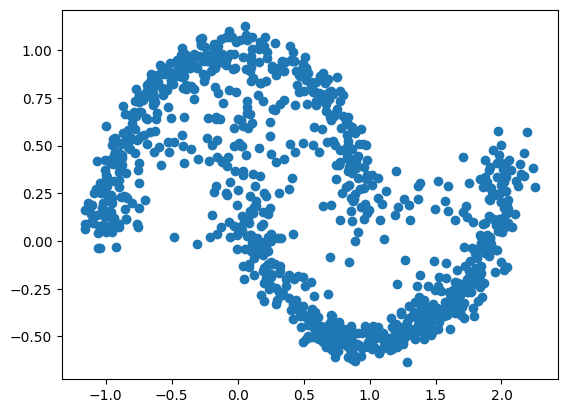

In [ ]:
z = p_z0.sample((1000, )).to(device)
logp_diff_t = torch.zeros(1000, 1).to(device)
x, _ = odeint(
    func,
    (z, logp_diff_t),
    torch.linspace(t0, t1, 250).type(torch.float32).to(device),
    atol=1e-5,
    rtol=1e-5,
    method='rk4',
)
x = x.detach().cpu().clone()

plt.scatter(x[-1, :, 0], x[-1, :, 1])
plt.show()